<a href="https://colab.research.google.com/github/elliotb01/linear-regression-machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
houses = pd.DataFrame(pd.read_csv("/content/house_data.csv"))

# Data Inspection

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

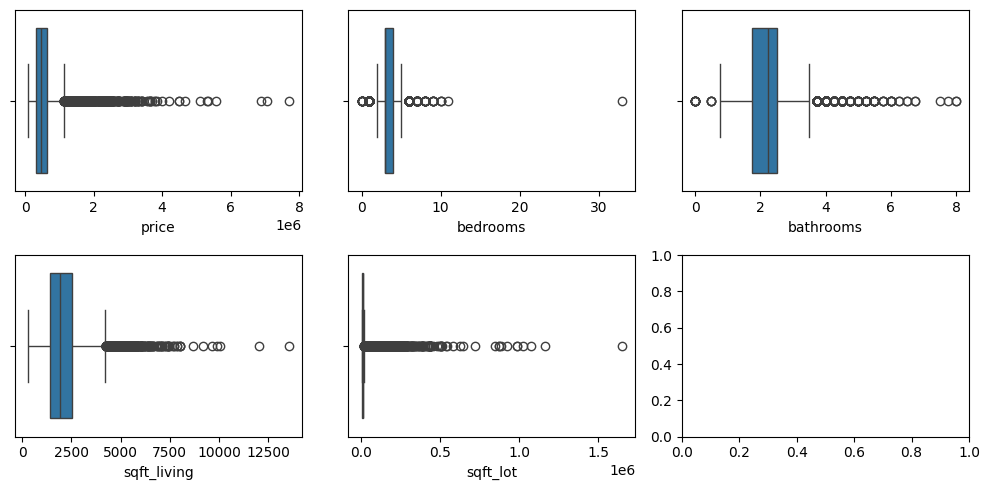

In [287]:
# Data Cleaning

# Checking for any Null Values

houses.isnull().sum()*100/houses.shape[0]
houses.drop(columns=['id','date'], inplace=True)

# Looking for outliers

fig, axis = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(x=houses['price'], ax = axis[0,0])
plt2 = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
plt3 = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
plt1 = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
plt2 = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])


plt.tight_layout()

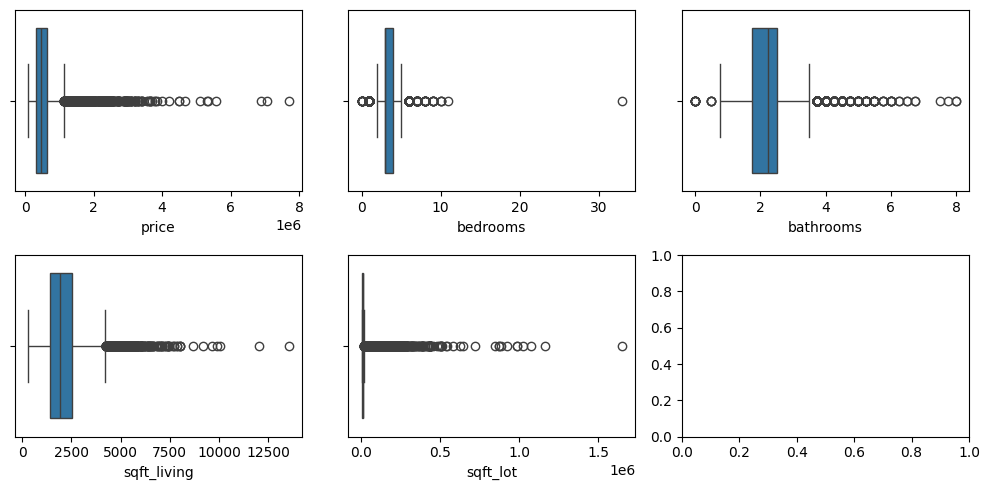

In [288]:
def outlier_remove(houses, column):
  IQR = houses[column].max() - houses[column].min()
  removed_outliers = houses[houses[column] < IQR]
  #return removed_outliers

outlier_remove(houses, 'price')
outlier_remove(houses, 'bedrooms')
outlier_remove(houses, 'bathrooms')
outlier_remove(houses, 'sqft_living')
outlier_remove(houses, 'sqft_lot')

fig, axis = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(x=houses['price'], ax = axis[0,0])
plt2 = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
plt3 = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
plt1 = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
plt2 = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])


plt.tight_layout()



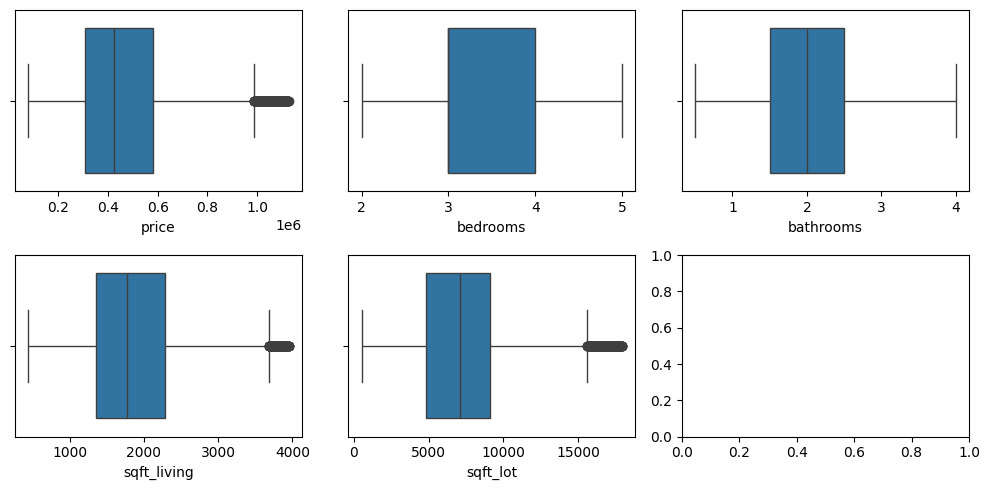

In [290]:
# Outlier Removal

fig, axis = plt.subplots(2,3, figsize = (10,5))

price_plt = sns.boxplot(x=houses['price'], ax = axis[0,0])
price_Q1 = houses.price.quantile(0.25)
price_Q3 = houses.price.quantile(0.75)
price_IQR = price_Q3 - price_Q1
houses = houses[(houses.price >= price_Q1 - 1.5 * price_IQR) & (houses.price <= price_Q3 + 1.5 * price_IQR)]

bedrooms_plt = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
bedrooms_Q1 = houses.bedrooms.quantile(0.25)
bedrooms_Q3 = houses.bedrooms.quantile(0.75)
bedrooms_IQR = bedrooms_Q3 - bedrooms_Q1
houses = houses[(houses.bedrooms >= bedrooms_Q1 - 1.5 * bedrooms_IQR) & (houses.bedrooms <= bedrooms_Q3 + 1.5 * bedrooms_IQR)]

bathrooms_plt = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
bathrooms_Q1 = houses.bathrooms.quantile(0.25)
bathrooms_Q3 = houses.bathrooms.quantile(0.75)
bathrooms_IQR = bathrooms_Q3 - bathrooms_Q1
houses = houses[(houses.bathrooms >= bathrooms_Q1 - 1.5 * bathrooms_IQR) & (houses.bathrooms <= bathrooms_Q3 + 1.5 * bathrooms_IQR)]

sqft_living_plt = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
sqft_living_Q1 = houses.sqft_living.quantile(0.25)
sqft_living_Q3 = houses.sqft_living.quantile(0.75)
sqft_living_IQR = sqft_living_Q3 - sqft_living_Q1
houses = houses[(houses.sqft_living >= sqft_living_Q1 - 1.5 * sqft_living_IQR) & (houses.sqft_living <= sqft_living_Q3 + 1.5 * sqft_living_IQR)]

sqft_lot_plt = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])
sqft_lot_Q1 = houses.sqft_lot.quantile(0.25)
sqft_lot_Q3 = houses.sqft_lot.quantile(0.75)
sqft_lot_IQR = sqft_lot_Q3 - sqft_lot_Q1
houses = houses[(houses.sqft_lot >= sqft_lot_Q1 - 1.5 * sqft_lot_IQR) & (houses.sqft_lot <= sqft_lot_Q3 + 1.5 * sqft_lot_IQR)]

plt.tight_layout()

In [291]:
# Initialise training model

from sklearn.model_selection import train_test_split

# Taking houses and splitting 70/30 for train/test

np.random.seed(0)
df_train, df_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 100)




**Manual data normalisation (No sklearn MinMaxScaler)**

houses_price_range = houses.price.max() - houses.price.min()
houses_bedrooms_range = houses.bedrooms.max() - houses.bedrooms.min()
houses_bathrooms_range = houses.bathrooms.max() - houses.bathrooms.min()
houses_sqft_living_range = houses.sqft_living.max() - houses.sqft_living.min()
houses_sqft_lot_range = houses.sqft_lot.max() - houses.sqft_lot.min()

houses.price = (houses.price - houses.price.min()) / houses_price_range
houses.bedrooms = (houses.bedrooms - houses.bedrooms.min()) / houses_bedrooms_range
houses.bathrooms = (houses.bathrooms - houses.bathrooms.min()) / houses_bathrooms_range
houses.sqft_living = (houses.sqft_living - houses.sqft_living.min()) / houses_sqft_living_range
houses.sqft_lot = (houses.sqft_lot - houses.sqft_lot.min())


In [292]:
# sklearn data normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Fit the scaler only on the training data
df_train[variables] = scaler.fit_transform(df_train[variables])

In [293]:
y_train = df_train.pop('price')
X_train = df_train

In [294]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [295]:
rfe = RFE(estimator=lr, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', np.True_, np.int64(1)),
 ('bathrooms', np.True_, np.int64(1)),
 ('sqft_living', np.False_, np.int64(13)),
 ('sqft_lot', np.False_, np.int64(3)),
 ('floors', np.False_, np.int64(4)),
 ('waterfront', np.True_, np.int64(1)),
 ('view', np.True_, np.int64(1)),
 ('condition', np.False_, np.int64(2)),
 ('grade', np.True_, np.int64(1)),
 ('sqft_above', np.False_, np.int64(8)),
 ('sqft_basement', np.False_, np.int64(9)),
 ('yr_built', np.False_, np.int64(6)),
 ('yr_renovated', np.False_, np.int64(11)),
 ('zipcode', np.False_, np.int64(7)),
 ('lat', np.True_, np.int64(1)),
 ('long', np.False_, np.int64(5)),
 ('sqft_living15', np.False_, np.int64(10)),
 ('sqft_lot15', np.False_, np.int64(12))]

In [296]:
column = X_train.columns[rfe.support_]
column

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade', 'lat'], dtype='object')

In [297]:
X_train.columns[~rfe.support_]

Index(['sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [298]:
import statsmodels.api as sm

X_train_rfe = X_train[column]

lm = sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                          1.332e+04
Date:                Tue, 26 Aug 2025   Prob (F-statistic):                        0.00
Time:                        20:50:51   Log-Likelihood:                          4558.4
No. Observations:               11807   AIC:                                     -9105.
Df Residuals:                   11801   BIC:                                     -9061.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 0, 'Errors')

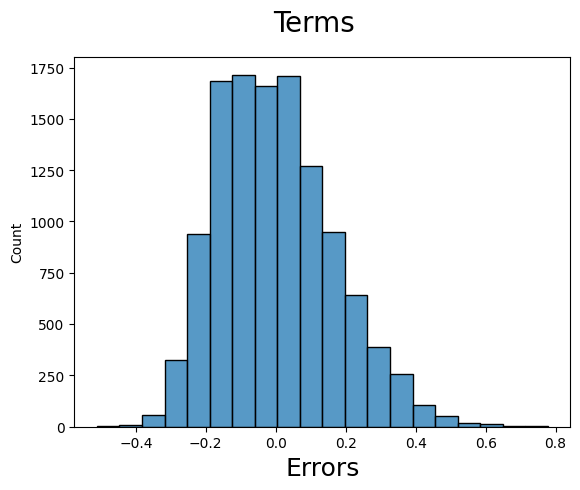

In [299]:
# Analysis of training data

y_train_price = lm.predict(X_train_rfe)

res = (y_train_price - y_train)

%matplotlib inline
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

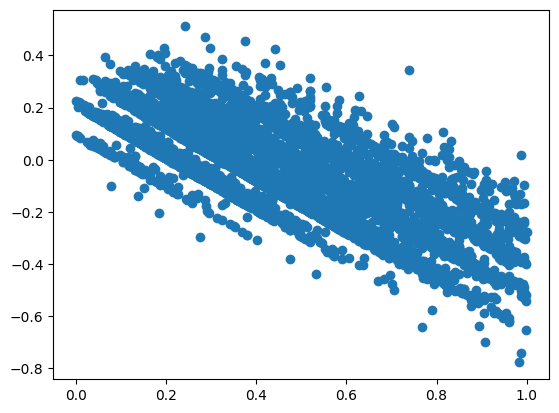

In [300]:
res = (y_train_price - y_train)

plt.scatter(y_train,res)
plt.show()

In [301]:
# Evaluating the model

# Only transform the test data using the scaler fitted on the training data
df_test[variables] = scaler.transform(df_test[variables])

y_test = df_test.pop('price')
X_test = df_test

# X_test = sm.add_constant(X_test) # Remove constant addition here

In [304]:
# Make predictions
from sklearn.metrics import r2_score
import statsmodels.api as sm

X_test_rfe = X_test[X_train_rfe.columns]

# Remove constant addition here
# X_test_rfe = sm.add_constant(X_test_rfe)

y_prediction = lm.predict(X_test_rfe)

r2_score(y_test, y_pred)

0.32657528609699193

Text(0, 0.5, 'y_prediction')

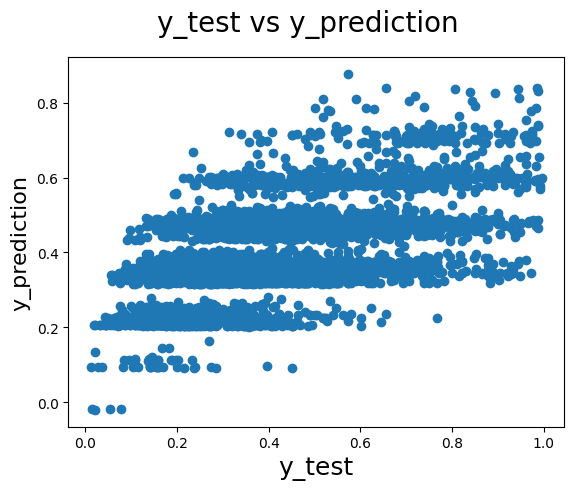

In [306]:
# Plotting y_test and y_prediction to see the spread of data
fig = plt.figure()
plt.scatter(y_test,y_prediction)
fig.suptitle('y_test vs y_prediction', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_prediction', fontsize=16)